In this project, we aim to apply the different notions we are learning during the course.

We will perform a basic data analysis of a very simple set of experiments in a guided way. The idea is that you write your own code to solve the differents steps. If you get stuck in a step, you will find tips by checking the code of the markdown cell. If you find it really difficult to progress to the next step or you can compare your code, you can find the solution in the solved notebook. 

# Final Project: Experiments and objectives

We have performed a set of cell cultures in which cells with a GFP reporter are treated under diverse conditions.

We have the following experiment:

 - Culture images of Bright Field and GFP channels for the control and the different conditions:
    - Control sample
    - 7 Condition samples

We would like to check:
 - How the conditions change:
    - Number of cells in the culture
    - The size of the cells
    - The proportion of cells
    - The GFP expression

## Setting up

The data that we will analyze in this project is fake. To generate it you have to run the code in `make_data.py` running it from the `8_Project` folder.

```
.../8_Project> python make_data.py
```

If you run it correctly, the folder `8_Project/data` will populate with some data files.

# Upload packages

It is a good practice to put all the packages that you are going to import at the beginning of the document so you always know the packages that you have access to. In the following cell, put the packages that you will be requiring for the analysis as you need them.

In [47]:
#Add package importation
from skimage import io as skio
from skimage import feature
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as st

# First project: Analysis of Image Data

The first thing we would like to analyze is the data coming from the imaging experiments. 

In the following, we will go over the steps in a guided mode to apply the different concepts that we learned during the course.

## Have a first look at the data

The first thing to do would be to have a look at the data that we are dealing with. 

 1. Import the packages that you may need for this purpose
<!-- You will need matplotlib.pyplot and skimage.io -->
 2. Load the Control Samples
<!-- May need to use io.imread -->
 3. Plot them in a figure with two axes and add the comments that you may find relevant to the figure
<!-- May need to use the following functions:
 - plt.subplots or plt.subplots_mosaic
 - ax.imshow
 - ax.set_title -->

In [48]:
#Load the images
controlBF = skio.imread("data/Condition_1_bright_field_image.tif")
controlGFP = skio.imread("data/Condition_1_GFP_image.tif")

Text(0.5, 1.0, 'GFP')

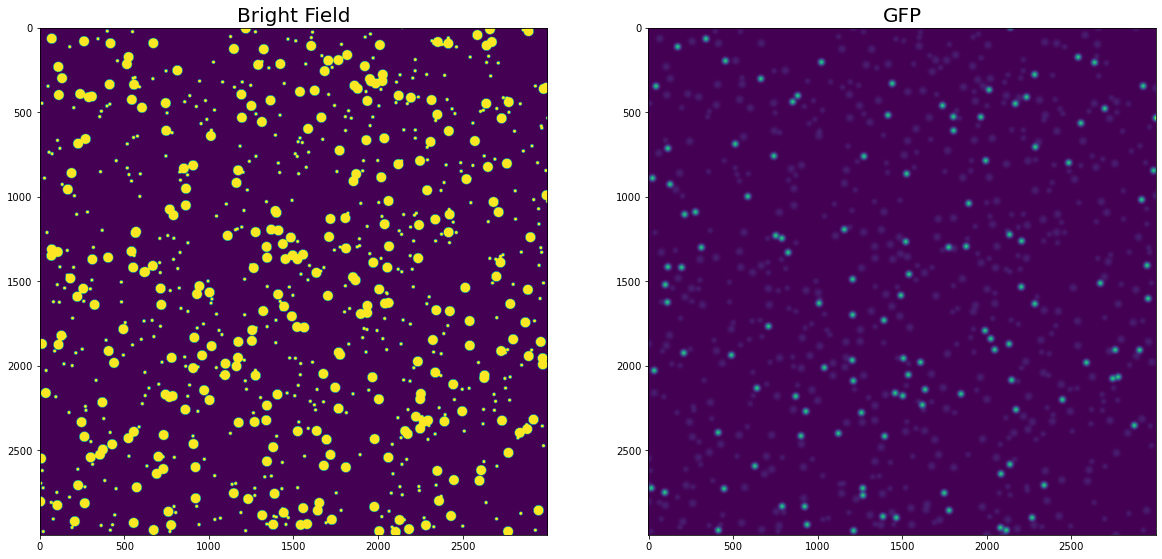

In [49]:
#Plot the images
fig, ax = plt.subplots(1,2,figsize=[20,10])

ax[0].imshow(controlBF)
ax[0].set_title("Bright Field", fontsize=20)
ax[1].imshow(controlGFP)
ax[1].set_title("GFP", fontsize=20)

We can see that the data is composed of blobs of different sizes and the GFP expression of the cells fluctuate between cells.

## Find particles in the images

Our particles are quite spherical. These particles are also called blobs. 

 1. Look in `scikit-image` for a function to detect blobs and read the documentation.
<!-- https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html?highlight=blob%20detection -->

We are going to use this function to detect our blobs. 

 2. Add to import the required packages that you may need.
 3. Use the found function to detect the blobs in the bright field image and check the returning object. That means each row and each column?
<!-- Use `feature.blob_log` -->
 4. Visualize the results by plotting a red point over each found blob. (Pay attention that `imshow` plots X, Y axis reversed respect to `scatter``).
Use `sns.scatter`

In [50]:
# Find blobs 
blobs = feature.blob_dog(controlBF)
blobs

array([[1556.        ,  954.        ,   42.94967296],
       [1330.        ,   84.        ,   42.94967296],
       [ 361.        , 2999.        ,   42.94967296],
       ...,
       [ 497.        , 2606.        ,   10.48576   ],
       [1181.        , 2188.        ,    6.5536    ],
       [2721.        ,   18.        ,    6.5536    ]])

<AxesSubplot:>

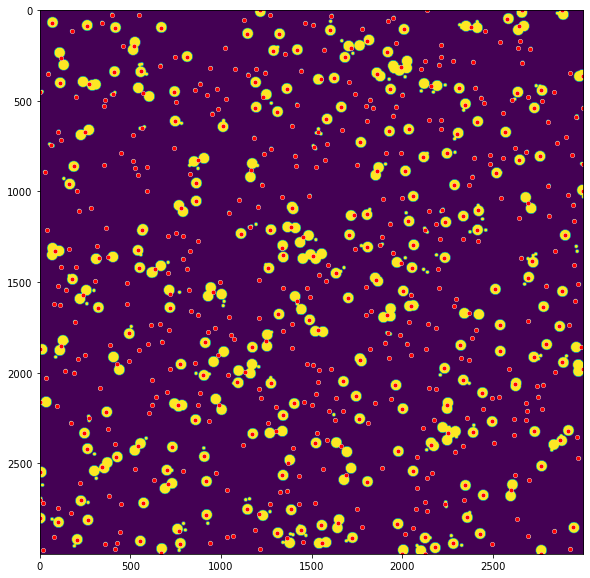

In [51]:
# Plot blobs
fig, ax = plt.subplots(figsize=[10,10])

ax.imshow(controlBF)
sns.scatterplot(x=blobs[:,1], y=blobs[:,0], s=20, color="red", ax=ax)

 5. The detection was good but there are some mistakes. This is because the blob detection algorithm requires to tune appropriately the parameters `min_sigma` and `max_sigma`. Try 5 and 20.

In [52]:
# Find blobs 
blobs = feature.blob_dog(controlBF,min_sigma=5,max_sigma=20)
blobs

array([[1539. , 2511. ,   12.8],
       [1881. , 2538. ,   12.8],
       [2718. ,  571. ,   12.8],
       ...,
       [2726. , 1429. ,    8. ],
       [ 513. , 1275. ,    8. ],
       [ 847. , 2999. ,   12.8]])

<AxesSubplot:>

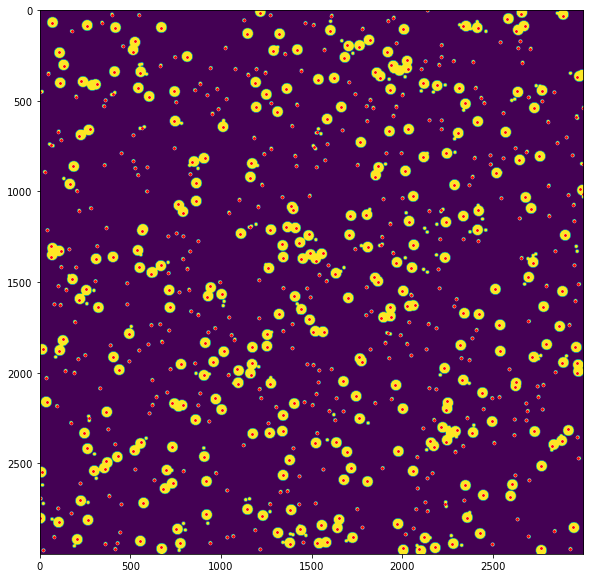

In [53]:
# Plot blobs
fig, ax = plt.subplots(figsize=[10,10])

ax.imshow(controlBF)
sns.scatterplot(x=blobs[:,1], y=blobs[:,0], s=10, color="red", ax=ax)

This looks a lot better, there are still some blobs not detected and some mistakes but the vast majority of blobs are correctly detected. For our purposes, this is more than okay. 

This is the good thing about python being an interpreted language and having a tool like jupyter lab: We can immediately see the partial results and adapt our analysis as we produce it. 

## Measure the intensity of each particle

Now that we have the image, we want to measure the intensity of each particle.

 1. Get the intensity of each particle using the position of the centers extracted. Notice that the blobs positions are given in float format. For being positions of an array they have to be integers.
<!-- You can use a for loop going over each blob result or you can find all the centers all at once giving all the positions at the same time. Notice that the  -->


In [54]:
#Get intensity of each blob
blobsGFP = np.zeros(blobs.shape[0])

for i in range(blobs.shape[0]):
    blobsGFP[i] = controlGFP[int(blobs[i,0]),int(blobs[i,1])]

In [55]:
#Get intensity of each blob (SHORT ALTERNATIVE)
blobsGFP = controlGFP[blobs[:,0].astype(int),blobs[:,1].astype(int)]

## Put all the blob information in a DataFrame

Now we have an array with the position and radius of the blobs and other with the intensity of the blobs. It may be convenient to group everything together in a single object. A DataFrame seems a good object for storing this data as we have table-like information (blobs x properties) and each property is of a different format:

 - x and y are integers
 - radius is a float
 - GFP expression is a float

 1. Make a DataFrame with all the information of the blobs.

In [56]:
#Construct Dataframe
blobs_df = pd.DataFrame()

blobs_df["x"] = blobs[:,0].astype(int)
blobs_df["y"] = blobs[:,1].astype(int)
blobs_df["radius"] = blobs[:,2]
blobs_df["GFP"] = blobsGFP

blobs_df

,x,y,radius,GFP
0,1539,2511,12.8,0.043110
1,1881,2538,12.8,0.043110
2,2718,571,12.8,0.043110
3,729,1769,12.8,0.043110
4,2216,368,12.8,0.043110
...,...,...,...,...
635,997,204,8.0,0.038463
636,2565,2621,8.0,0.038472
637,2726,1429,8.0,0.038317
638,513,1275,8.0,0.038463


## Make a function Automatize the pipeline

Now all the information that we need for our object is inside the DataFrame. We will have to get this information for each experimental condition. This means that we will have to repeat many times.

It seems convenient to put the pipeline in the form of a function that takes the images and returns the DataFrame with the detected blobs and the DataFrame.

 1. Make a function that takes the images and returns the DataFrame with the blobs and their information.
 2. Check that the function returns the dataframe as expected

In [57]:
#Code of the function
def pipeline(image_bf,image_gfp):
    #Detect blobs
    blobs = feature.blob_dog(image_bf,min_sigma=5,max_sigma=20)
    #Measure GFP blobs
    blobsGFP = image_gfp[blobs[:,0].astype(int),blobs[:,1].astype(int)]

    #Make DataFrame
    blobs_df = pd.DataFrame()

    blobs_df["x"] = blobs[:,0].astype(int)
    blobs_df["y"] = blobs[:,1].astype(int)
    blobs_df["radius"] = blobs[:,2]
    blobs_df["GFP"] = blobsGFP

    return blobs_df

In [58]:
#Check function
pipeline(controlBF,controlGFP)

,x,y,radius,GFP
0,1539,2511,12.8,0.043110
1,1881,2538,12.8,0.043110
2,2718,571,12.8,0.043110
3,729,1769,12.8,0.043110
4,2216,368,12.8,0.043110
...,...,...,...,...
635,997,204,8.0,0.038463
636,2565,2621,8.0,0.038472
637,2726,1429,8.0,0.038317
638,513,1275,8.0,0.038463


## Do the analysis for all the samples

Now, we can do the analysis for all the samples.

### Load all the files and visualize them

Now that we had a first look at the data and we managed to open it, let's automatize the loading process.

 1. Load all the files in a container for bright fields and other for images with BFP
 2. Plot all the files adding appropriate comments to the image
<!-- You can use two dictionaries and use a for loop to automatize the process. -->

In [59]:
#Load the images
images_bf = dict()
images_gfp = dict() 

images_bf["Control"] = skio.imread("data/Control_bright_field_image.tif")
images_gfp["Control"] = skio.imread("data/Control_GFP_image.tif")
for i in range(1,8):
    name_bf = "data/Condition_"+str(i)+"_bright_field_image.tif"
    name_gfp = "data/Condition_"+str(i)+"_GFP_image.tif"
    images_bf["Condition_"+str(i)] = skio.imread(name_bf)
    images_gfp["Condition_"+str(i)] = skio.imread(name_gfp)


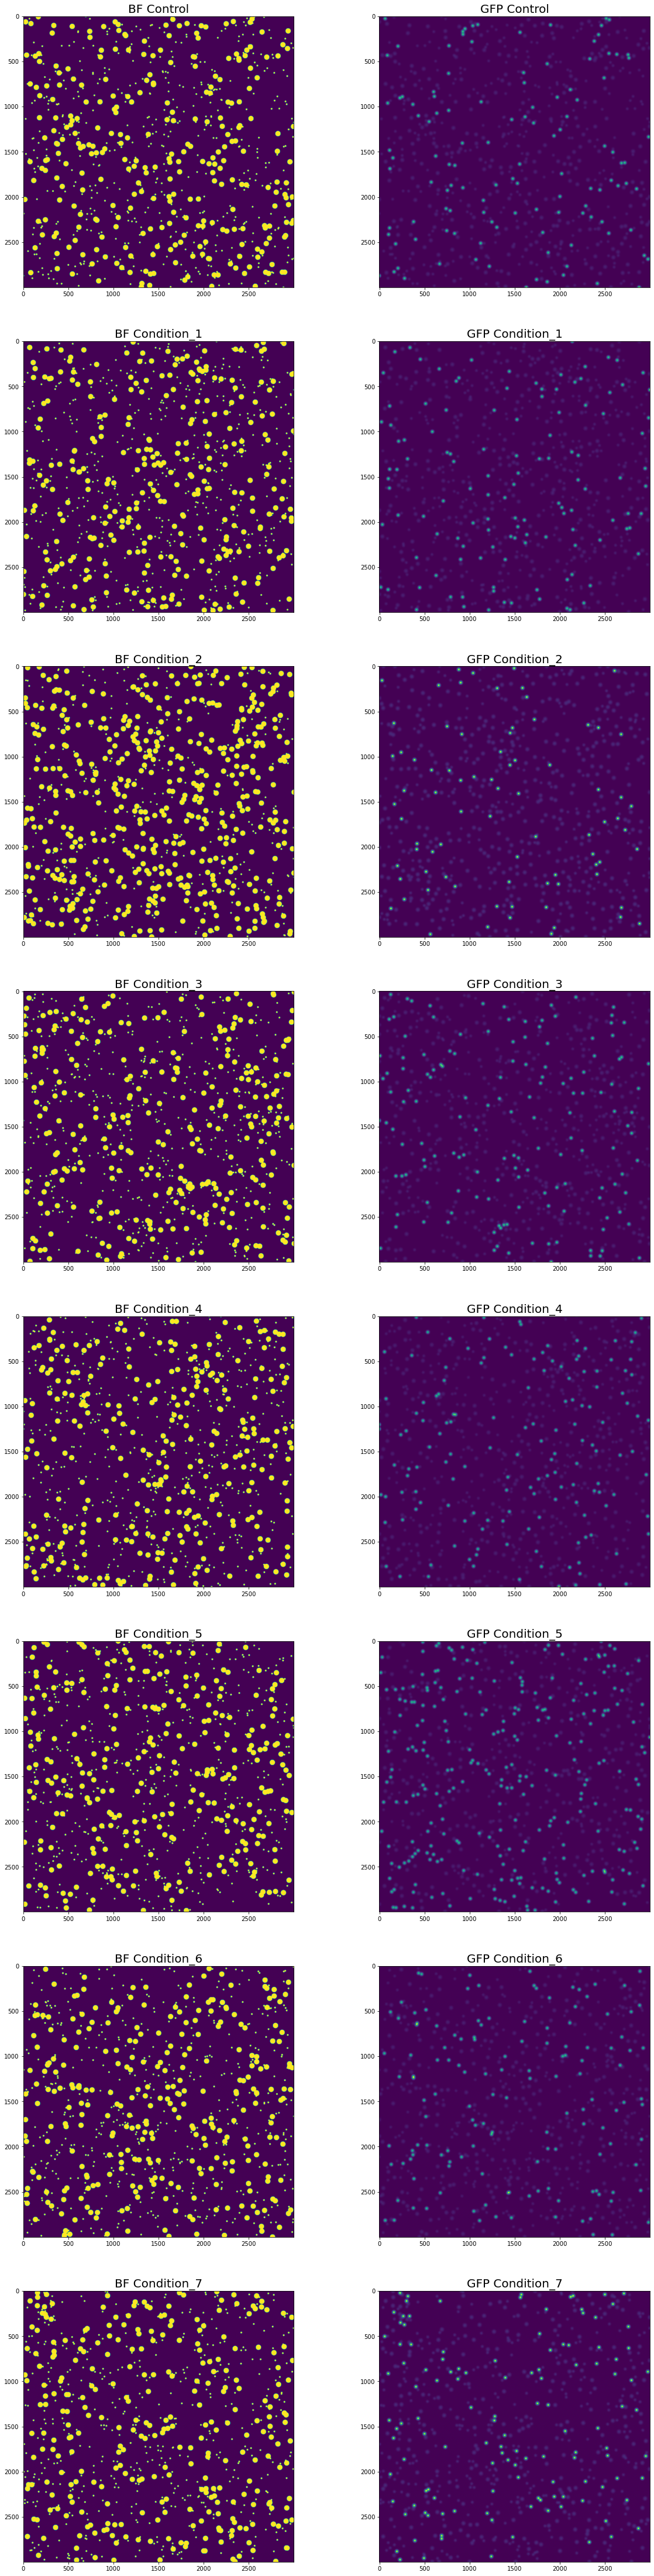

In [60]:
#Plot the images
fig, ax = plt.subplots(8,2,figsize=[20,80])

for i,name in enumerate(images_bf.keys()):
    ax[i,0].imshow(images_bf[name])
    ax[i,0].set_title("BF "+name, fontsize=20)
    ax[i,1].imshow(images_gfp[name])
    ax[i,1].set_title("GFP "+name, fontsize=20)

### Perform the analysis for all the samples and add them to a joint DataFrame

Now analyze all the samples and put all the DataFrames together. For that, you will have to add a column to the DataFrame that indicates the sample each blob came from.

In [61]:
#Make a joint dataframe with all the data
blob_data = pd.DataFrame()

for i in images_bf.keys():
    dataframe = pipeline(images_bf[i],images_gfp[i])
    dataframe["Condition"] = i

    blob_data = blob_data.append(dataframe)

## Analyze the data

Finally, we are ready to analyze the dataset. We want to check:

 - Change in the distribution of blob sizes by condition
 - Change in the expression of GFP by condition

### Visualize by conditions

We can make many plots to check the different conditions. However, it is possible to show all the information with a single plot exploiting the capabilities of seaborn.

 - Change of Distribution -> histogram or violinplot

Variables
 - Condition (Category) -> x or hue
 - GFP expression (Continuum) -> y
 - Sizes (we have only two sizes of blobs, so it can be an Int or a Category) -> hue or x

 1. Make a plot that contains all the information in it.

<AxesSubplot:xlabel='Condition', ylabel='GFP'>

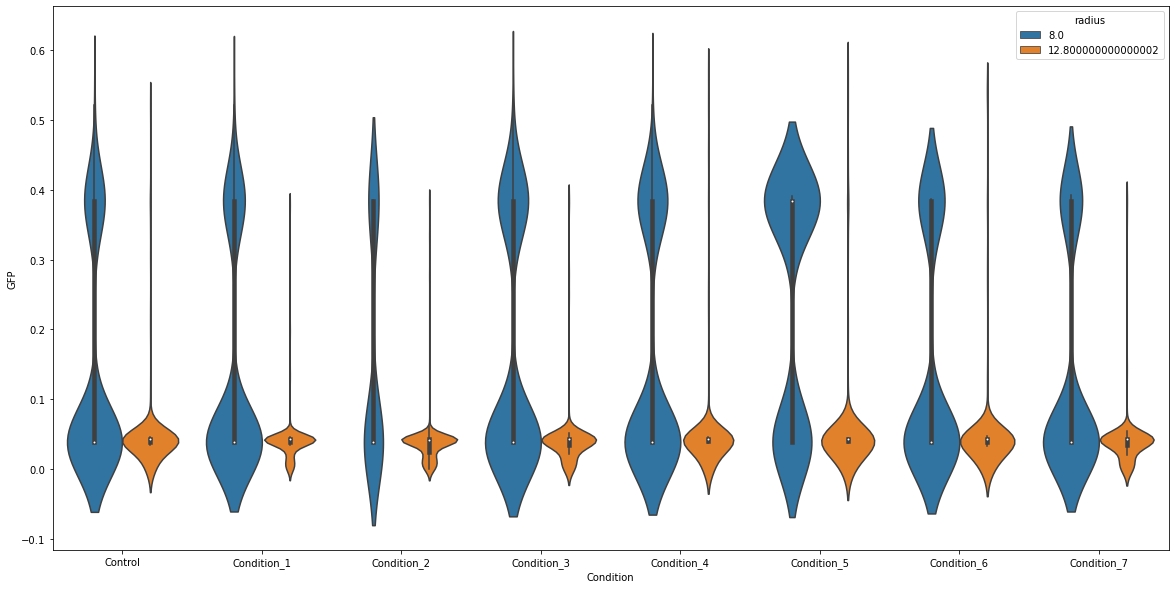

In [62]:
#Make plot
fig, ax = plt.subplots(figsize=[20,10])

sns.violinplot(data=blob_data,x="Condition",y="GFP",hue="radius",scale="count")

From the data we can see the following clear things:

 - Condition 2 has fewer cells of smaller size.
 - Condition 5 has more small cells expressing high values of GFP.

### Make statistical analysis

Let's Make the above statements more strict making a statistical test over the different conditions.

For that, we would use a two-sample Kolgomorov Test to compare the distributions between the control and the different Conditions.

Do:

 1. Find a function that implements the Kolmorov test between two samples
<!-- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp -->
 2. Perform the test comparing each condition for the radius of the particles.
<!-- You may use a loop for and slicing of the pandas DataFrame to extract the information you want from the object. -->
 3. Perform the test comparing each condition with the GFP of the particles.

In [65]:
#Statistical analysis radius
control = blob_data.loc[blob_data["Condition"]=="Control","radius"]
for i in range(1,8):
    condition = blob_data.loc[blob_data["Condition"]=="Condition_"+str(i),"radius"]

    print("Condition "+str(i)+": ",st.ks_2samp(control,condition))

Condition 1:  KstestResult(statistic=0.02660686119873817, pvalue=0.9710768213401337)
Condition 2:  KstestResult(statistic=0.2403661780169481, pvalue=8.881784197001252e-16)
Condition 3:  KstestResult(statistic=0.0103139983598227, pvalue=0.999999999999859)
Condition 4:  KstestResult(statistic=0.03144941845064657, pvalue=0.8930390623408737)
Condition 5:  KstestResult(statistic=0.018033895627533162, pvalue=0.9998765477814495)
Condition 6:  KstestResult(statistic=0.012618296529968454, pvalue=0.9999999997691126)
Condition 7:  KstestResult(statistic=0.013448184495093163, pvalue=0.9999999620581955)


In [69]:
#Statistical analysis GFP
control = blob_data.loc[blob_data["Condition"]=="Control","GFP"]
for i in range(1,8):
    condition = blob_data.loc[blob_data["Condition"]=="Condition_"+str(i),"GFP"]

    print("Condition "+str(i)+": ",st.ks_2samp(control,condition))

Condition 1:  KstestResult(statistic=0.022047515772870663, pvalue=0.996486575865619)
Condition 2:  KstestResult(statistic=0.1399669792692617, pvalue=5.2014375416797876e-06)
Condition 3:  KstestResult(statistic=0.03991517365251385, pvalue=0.6744998087219862)
Condition 4:  KstestResult(statistic=0.05854745105593951, pvalue=0.20786529611330962)
Condition 5:  KstestResult(statistic=0.19121458509204545, pvalue=1.138990013416219e-10)
Condition 6:  KstestResult(statistic=0.04258675078864353, pvalue=0.6137131884510002)
Condition 7:  KstestResult(statistic=0.031965684632574605, pvalue=0.8884890821624878)
